**ED 10 - Transformada de Hough**

Aluno: Mauricio dos Santos de Jesus

1) A partir da imagem abaixo (em anexo no email), utilizar a Transformada de
Hough para calcular segmentos de linhas que conectem as bordas dos
pontos (ver seção 13.2 do Livro do Corke).

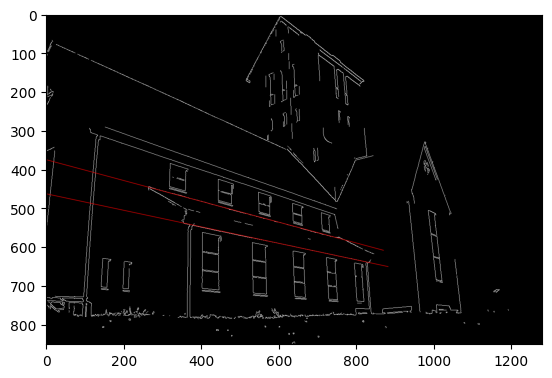

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
img = cv2.imread("/content/church.png", 0)

# Detectar bordas na imagem usando Canny com diferentes parâmetros
edges = cv2.Canny(img, 290, 390, apertureSize=3)

# Aplicar a Transformada de Hough para encontrar linhas
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=260)

# Desenhar as linhas detectadas na imagem original
if lines is not None:
    img_with_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 1, cv2.LINE_AA)

    plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    plt.savefig("/content/church_th.png", facecolor="white")
    plt.show()
else:
    print("Nenhuma linha detectada.")
